In [1]:
import os 
notebook_path = os.getcwd()
os.chdir(os.path.dirname(notebook_path))

In [2]:
import re
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import mplhep as hep
plt.style.use(hep.style.ATLAS)
# plt.rcParams['legend.loc'] = 'upper left'
figsize = (7, 7)

TITLE = r'NVIDIA GeForce RTX 2080 Ti, ODD detector, $\mu = 200$, traccc e7a03e9'

In [3]:
def plot_var(concurrency, data, ylabel, xlabel, filename='', yerr=None):
    fig, ax = plt.subplots(figsize=figsize)
    plt.errorbar(concurrency, data, yerr=yerr)
    plt.xlabel(xlabel, loc='right')
    plt.ylabel(ylabel, loc='top')
    plt.xlim(min(concurrency), max(concurrency))
    plt.title(TITLE, fontsize=10, loc='left')
    if filename != '':
        plt.savefig(filename)
    plt.show()
    
def plot_multiple_vars(concurrency, data, data_labels, ylabel, xlabel, filename=''):
    fig, ax = plt.subplots(figsize=figsize)
    for i in range(len(data)):
        plt.plot(concurrency, data[i], label=data_labels[i])
    plt.xlabel(xlabel, loc='right')
    plt.ylabel(ylabel, loc='top')
    plt.xlim(min(concurrency), max(concurrency))
    plt.title(TITLE, fontsize=10, loc='left')
    plt.legend()
    if filename != '':
        plt.savefig(filename)
    plt.show()

def plot_var_and_compare(con, con_1gpu, data, data_1gpu, ylabel, xlabel, ylims=None,
                         filename='', yerr=None, yerr_1gpu=None, num_instances='One', num_GPUS=4):
    fig, ax = plt.subplots(figsize=figsize)
    plt.errorbar(con, data, yerr=yerr, label=f'{num_GPUS} RTX 2080 GPUs')
    plt.errorbar(con_1gpu, data_1gpu, yerr=yerr_1gpu, label='1 RTX 2080 GPU')
    plt.xlabel(xlabel, loc='right')
    plt.ylabel(ylabel, loc='top')
    plt.xlim(min(con)-0.1, max(con)+0.1)
    plt.title(TITLE, fontsize=10, loc='left')
    plt.legend(title=f'{num_instances} Triton model instance per:')
    if ylims is not None:
        plt.ylim(ylims)
    if filename != '':
        plt.savefig(filename)
    plt.show()


In [4]:
DIR = 'data/4gpu_2080/'
df_1gpu = pd.read_csv(os.path.join(DIR, '1inst_1gpu_take1.csv')).sort_values('Concurrency')
df_4gpu = pd.read_csv(os.path.join(DIR, '1inst_4gpu_take1.csv')).sort_values('Concurrency')
df_4gpu

,Concurrency,Inferences/Second,Client Send,Network+Server Send/Recv,Server Queue,Server Compute Input,Server Compute Infer,Server Compute Output,Client Recv,p50 latency,p90 latency,p95 latency,p99 latency,Avg latency,request/response,response wait,Avg GPU Utilization,Avg GPU Power Usage,Max GPU Memory Usage,Total GPU Memory
0,1,2.80119,2304,78814,69,19,270997,373,7,348065,381380,388796,393505,352586,2311,350186,NaN,NaN,NaN,NaN
1,2,5.70082,1801,0,65,24,223641,209,6,343705,366809,379547,410223,347015,1807,345116,NaN,NaN,NaN,NaN
2,3,8.46363,2080,81622,64,17,266127,352,8,345499,371324,383842,415711,350273,2088,348087,NaN,NaN,NaN,NaN
3,4,10.87460,1884,53353,2561,13,306080,495,8,362124,388250,394230,414494,364397,1892,362414,NaN,NaN,NaN,NaN
4,5,11.84560,1901,141247,49717,18,225656,229,9,395652,525047,545944,582743,418780,1910,416905,NaN,NaN,NaN,NaN
5,6,12.74310,1832,100175,82396,22,283230,580,9,432722,598215,657906,753226,468246,1841,466367,NaN,NaN,NaN,NaN
6,7,13.84840,1892,107496,120670,13,272495,374,9,529599,604719,639840,705198,502950,1901,500683,NaN,NaN,NaN,NaN
7,8,14.04920,1855,248015,47480,12,267879,399,9,552593,772369,857996,938906,565653,1864,563331,NaN,NaN,NaN,NaN
9,9,14.38730,2010,145052,229548,38,246219,571,8,571473,819594,884125,996750,623449,2018,621597,NaN,NaN,NaN,NaN
8,10,14.10350,1939,0,547977,13,272645,332,9,684363,1021429,1099172,1151645,705946,1948,702929,NaN,NaN,NaN,NaN


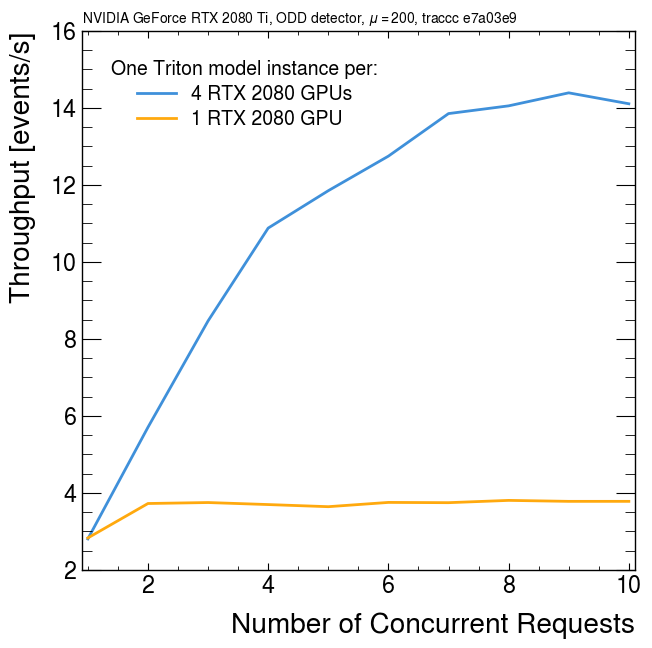

In [ ]:
plot_var_and_compare(df_4gpu['Concurrency'], df_1gpu['Concurrency'], 
                     df_4gpu['Inferences/Second'], df_1gpu['Inferences/Second'], 
                     'Throughput [events/s]', 'Number of Concurrent Requests',
                     filename=os.path.join(DIR, 'throughput_4gpu_vs_1gpu.pdf'))
plot_var_and_compare(df_4gpu['Concurrency'], df_1gpu['Concurrency'],
                     df_4gpu['Server Compute Infer'] * 1e-6, df_1gpu['Server Compute Infer'] * 1e-6,
                     'Inference Latency [s]', 'Number of Concurrent Requests',
                     filename=os.path.join(DIR, 'infer_latency_4gpu_vs_1gpu.pdf'))
plot_var_and_compare(df_4gpu['Concurrency'], df_1gpu['Concurrency'],
                     df_4gpu['Server Compute Input'], df_1gpu['Server Compute Input'],
                     'Input Processing Latency [us]', 'Number of Concurrent Requests',
                     filename=os.path.join(DIR, 'input_latency_4gpu_vs_1gpu.pdf'))
plot_var_and_compare(df_4gpu['Concurrency'], df_1gpu['Concurrency'],
                     df_4gpu['Server Compute Output'], df_1gpu['Server Compute Output'],
                     'Output Processing Latency [us]', 'Number of Concurrent Requests',
                     filename=os.path.join(DIR, 'output_latency_4gpu_vs_1gpu.pdf'))
plot_var_and_compare(df_4gpu['Concurrency'], df_1gpu['Concurrency'],
                     df_4gpu['Server Queue']*1e-6, df_1gpu['Server Queue']*1e-6,
                     'Server Queue Latency [s]', 'Number of Concurrent Requests',
                     filename=os.path.join(DIR, 'queue_latency_4gpu_vs_1gpu.pdf'),
                     ylims=(0, np.max(df_1gpu['Server Queue']*1e-6) + 0.1))

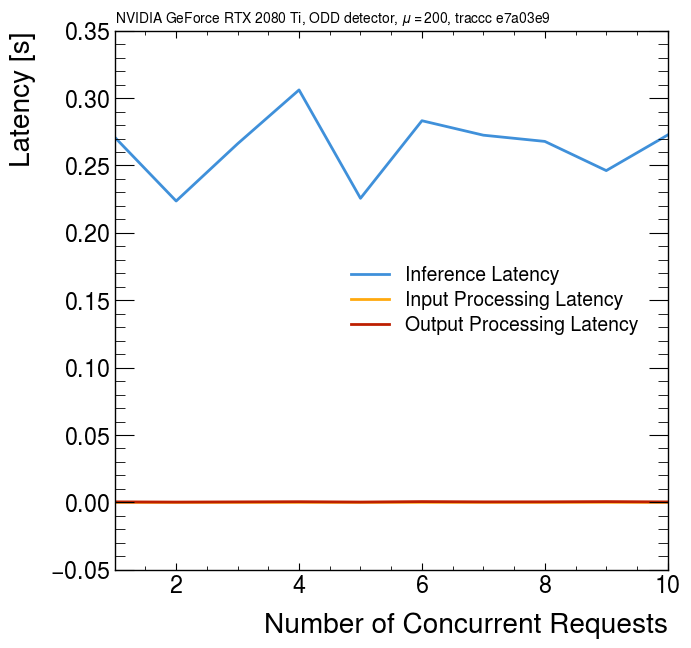

In [ ]:
plot_multiple_vars(df_4gpu['Concurrency'], [df_4gpu['Server Compute Infer'] * 1e-6, df_4gpu['Server Compute Input']*1e-6, df_4gpu['Server Compute Output']*1e-6],
                     ['Inference Latency', 'Input Processing Latency', 'Output Processing Latency'],
                        'Latency [s]', 'Number of Concurrent Requests',
                        filename=os.path.join(DIR, 'latency_breakdown_4gpu.pdf'))

## Two Model Instance per GPU

Scaling to two GPUs: okay
Scaling up more has some potential bottlenecks

In [ ]:
inst2_gpu1 = pd.read_csv(os.path.join(DIR, '2inst_1gpu_take1.csv')).sort_values('Concurrency')
inst2_gpu2 = pd.read_csv(os.path.join(DIR, '2inst_2gpu_take1.csv')).sort_values('Concurrency')

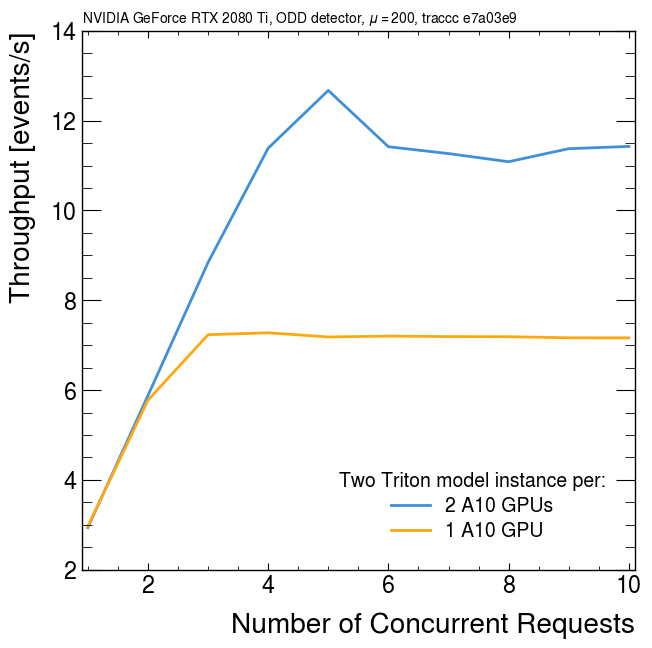

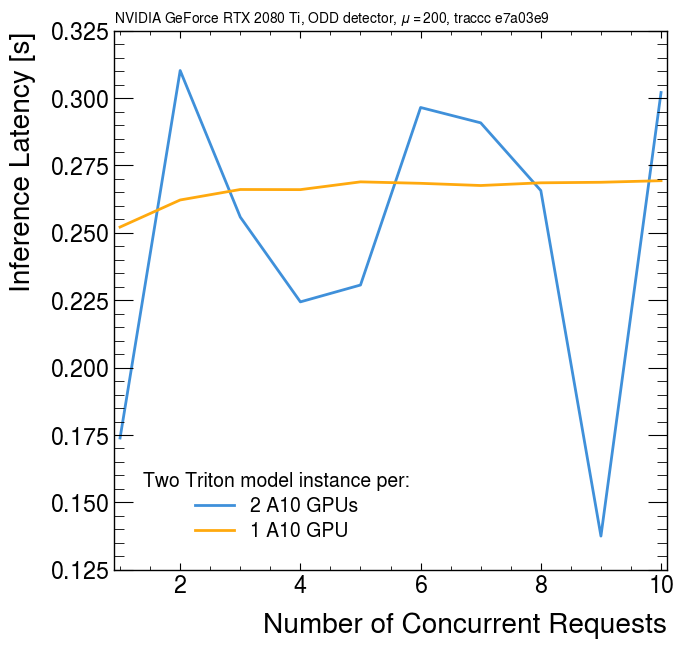

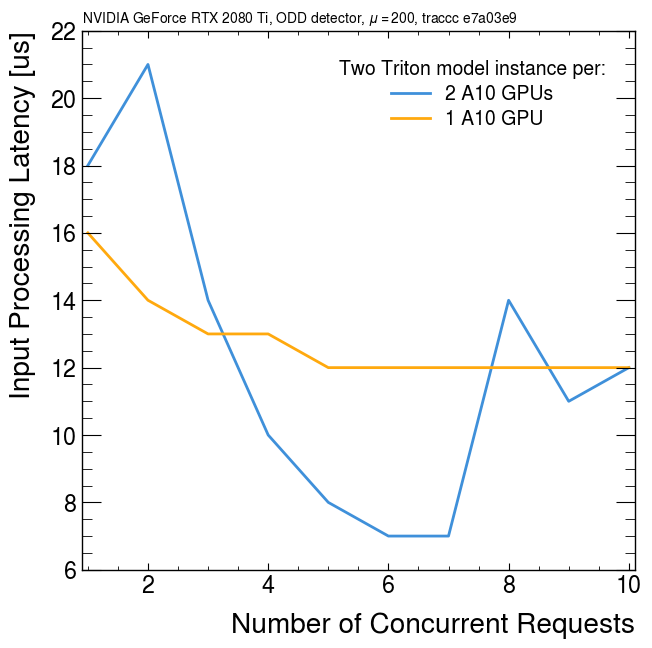

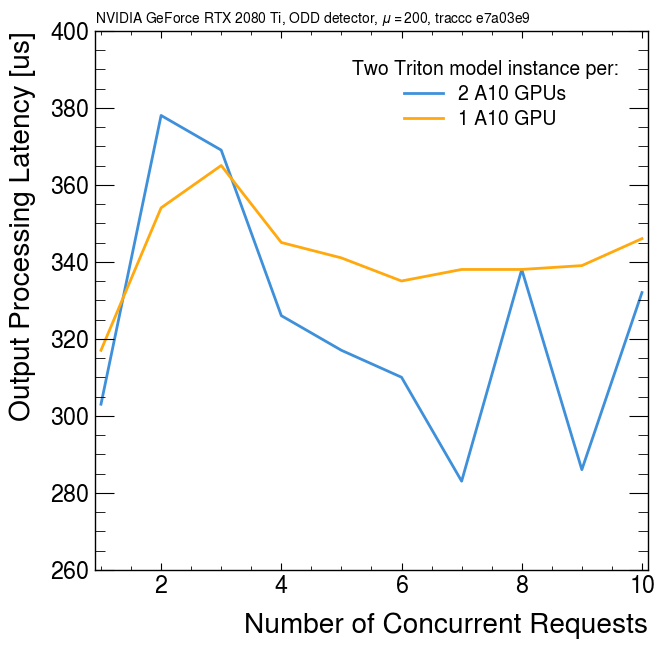

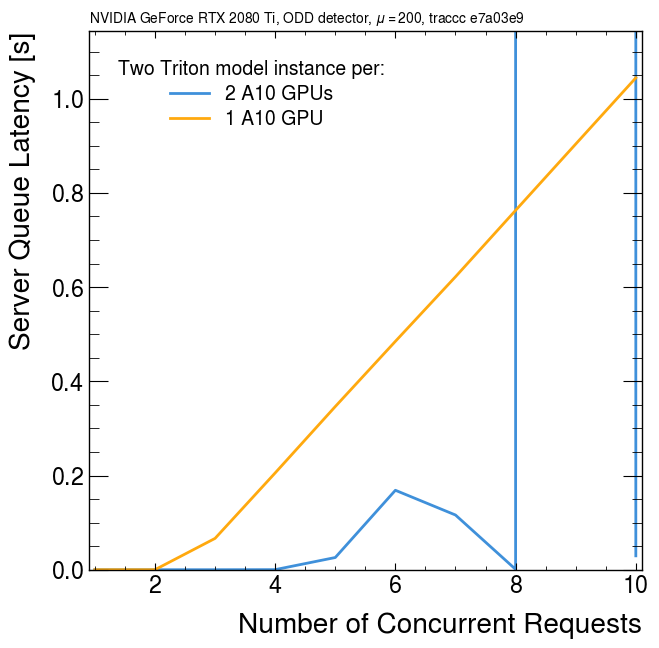

In [ ]:
plot_var_and_compare(inst2_gpu2['Concurrency'], inst2_gpu1['Concurrency'],
                     inst2_gpu2['Inferences/Second'], inst2_gpu1['Inferences/Second'],
                     'Throughput [events/s]', 'Number of Concurrent Requests',
                     filename=os.path.join(DIR, 'throughput_2inst_2gpu_vs_1inst_1gpu.pdf'),
                     num_instances='Two', num_GPUS=2)
plot_var_and_compare(inst2_gpu2['Concurrency'], inst2_gpu1['Concurrency'],
                        inst2_gpu2['Server Compute Infer']*1e-6, inst2_gpu1['Server Compute Infer']*1e-6,
                        'Inference Latency [s]', 'Number of Concurrent Requests',
                        filename=os.path.join(DIR, 'infer_latency_2inst_2gpu_vs_1inst_1gpu.pdf'),
                        num_instances='Two', num_GPUS=2)
plot_var_and_compare(inst2_gpu2['Concurrency'], inst2_gpu1['Concurrency'],
                        inst2_gpu2['Server Compute Input'], inst2_gpu1['Server Compute Input'],
                        'Input Processing Latency [us]', 'Number of Concurrent Requests',
                        filename=os.path.join(DIR, 'input_latency_2inst_2gpu_vs_1inst_1gpu.pdf'),
                        num_instances='Two', num_GPUS=2)
plot_var_and_compare(inst2_gpu2['Concurrency'], inst2_gpu1['Concurrency'],
                        inst2_gpu2['Server Compute Output'], inst2_gpu1['Server Compute Output'],
                        'Output Processing Latency [us]', 'Number of Concurrent Requests',
                        filename=os.path.join(DIR, 'output_latency_2inst_2gpu_vs_1inst_1gpu.pdf'),
                        num_instances='Two', num_GPUS=2)
plot_var_and_compare(inst2_gpu2['Concurrency'], inst2_gpu1['Concurrency'],
                        inst2_gpu2['Server Queue']*1e-6, inst2_gpu1['Server Queue']*1e-6,
                        'Server Queue Latency [s]', 'Number of Concurrent Requests',
                        filename=os.path.join(DIR, 'queue_latency_2inst_2gpu_vs_1inst_1gpu.pdf'),
                        num_instances='Two', num_GPUS=2,
                        ylims=(0, np.max(inst2_gpu1['Server Queue']*1e-6) + 0.1))

## Three Model Instances per GPU

(with 4 we get out-of-memory error)

GPU utilization > 95%

Doesn't scale well to multiple GPUs...

In [ ]:
inst3_gpu1 = pd.read_csv(os.path.join(DIR, '3inst_1gpu_take1.csv')).sort_values('Concurrency')

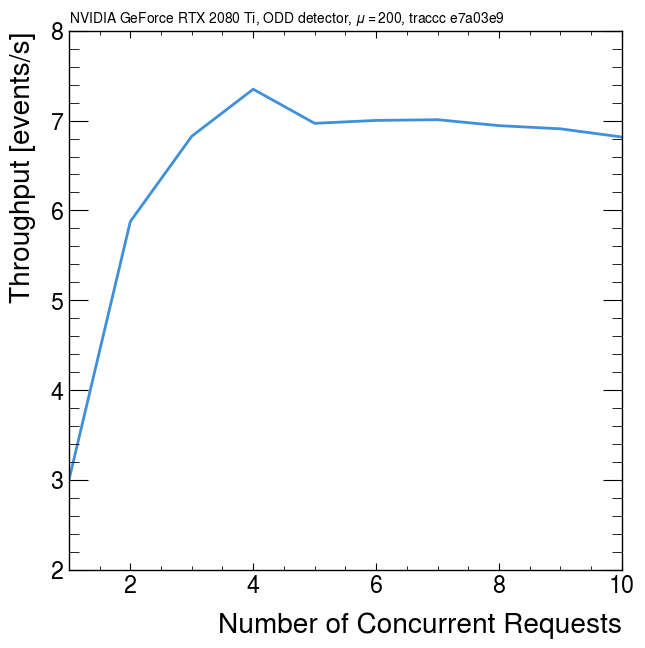

In [ ]:
plot_var(inst3_gpu1['Concurrency'], inst3_gpu1['Inferences/Second'], 'Throughput [events/s]', 'Number of Concurrent Requests',
         filename=os.path.join(DIR, 'throughput_3inst_1gpu.pdf'))